In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
class toyData():
    def __init__(self, dataset_n=None, random_seed_n=0, n_samples=500, plot=False):
        self.dataset_n = dataset_n
        self.random_seed_n = random_seed_n
        self.n_samples = n_samples
        self.plot = plot
        
    def generate_data(self):
        from sklearn import cluster, datasets, mixture
        np.random.seed(self.random_seed_n)

        # ============
        # Generate datasets. We choose the size big enough to see the scalability
        # of the algorithms, but not too big to avoid too long running times
        # ============
        n_samples = self.n_samples
        noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
        blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
        no_structure = np.random.rand(n_samples, 2), None

        # Anisotropicly distributed data
        random_state = 170
        X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.6, -0.6], [-0.4, 0.8]]
        X_aniso = np.dot(X, transformation)
        aniso = (X_aniso, y)

        # blobs with varied variances
        varied = datasets.make_blobs(
            n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
        )

        # ============
        # Set up cluster parameters
        # ============
        if self.plot:
            plt.figure(figsize=(9 * 2 + 3, 13))
            plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01)

        plot_num = 1

        default_base = {
            "quantile": 0.3,
            "eps": 0.3,
            "damping": 0.9,
            "preference": -200,
            "n_neighbors": 3,
            "n_clusters": 3,
            "min_samples": 7,
            "xi": 0.05,
            "min_cluster_size": 0.1,
        }

        datasets = [
            (
                noisy_circles,
                {
                    "damping": 0.77,
                    "preference": -240,
                    "quantile": 0.2,
                    "n_clusters": 2,
                    "min_samples": 7,
                    "xi": 0.08,
                },
            ),
            (
                noisy_moons,
                {
                    "damping": 0.75,
                    "preference": -220,
                    "n_clusters": 2,
                    "min_samples": 7,
                    "xi": 0.1,
                },
            ),
            (
                varied,
                {
                    "eps": 0.18,
                    "n_neighbors": 2,
                    "min_samples": 7,
                    "xi": 0.01,
                    "min_cluster_size": 0.2,
                },
            ),
            (
                aniso,
                {
                    "eps": 0.15,
                    "n_neighbors": 2,
                    "min_samples": 7,
                    "xi": 0.1,
                    "min_cluster_size": 0.2,
                },
            ),
            (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
            (no_structure, {}),
        ]
        datasets = [i[0] for i in datasets]
        return datasets
    
    def get_colors(self, y):
        colors = np.array(
                list(
                    islice(
                        cycle(
                            [
                                "#377eb8",
                                "#ff7f00",
                                "#4daf4a",
                                "#f781bf",
                                "#a65628",
                                "#984ea3",
                                "#999999",
                                "#e41a1c",
                                "#dede00",
                            ]
                        ),
                        int(max(y) + 1),
                    )
                )
        )

        return colors
    
    def plot_data(self, X, y):
        colors = self.get_colors(y)
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
    def one_hot_encoding(self, array_y):
        y_one_hot_encoded = np.zeros((array_y.size, array_y.max() + 1))
        y_one_hot_encoded[np.arange(array_y.size), array_y] = 1
        return y_one_hot_encoded
    
    def main(self):
        # Returns all datasets
        datasets = self.generate_data()
        if self.dataset_n == None:
            X = [x[0] for x in datasets]
            y = [y[1] for y in datasets]
            y = self.one_hot_encoding(y)
            return (X, y)

        dataset = datasets[self.dataset_n]
        X, y = dataset[0], dataset[1]
        
        if self.plot == True:
            self.plot_data(X, y)
        
        y = self.one_hot_encoding(y)
        return (X, y)

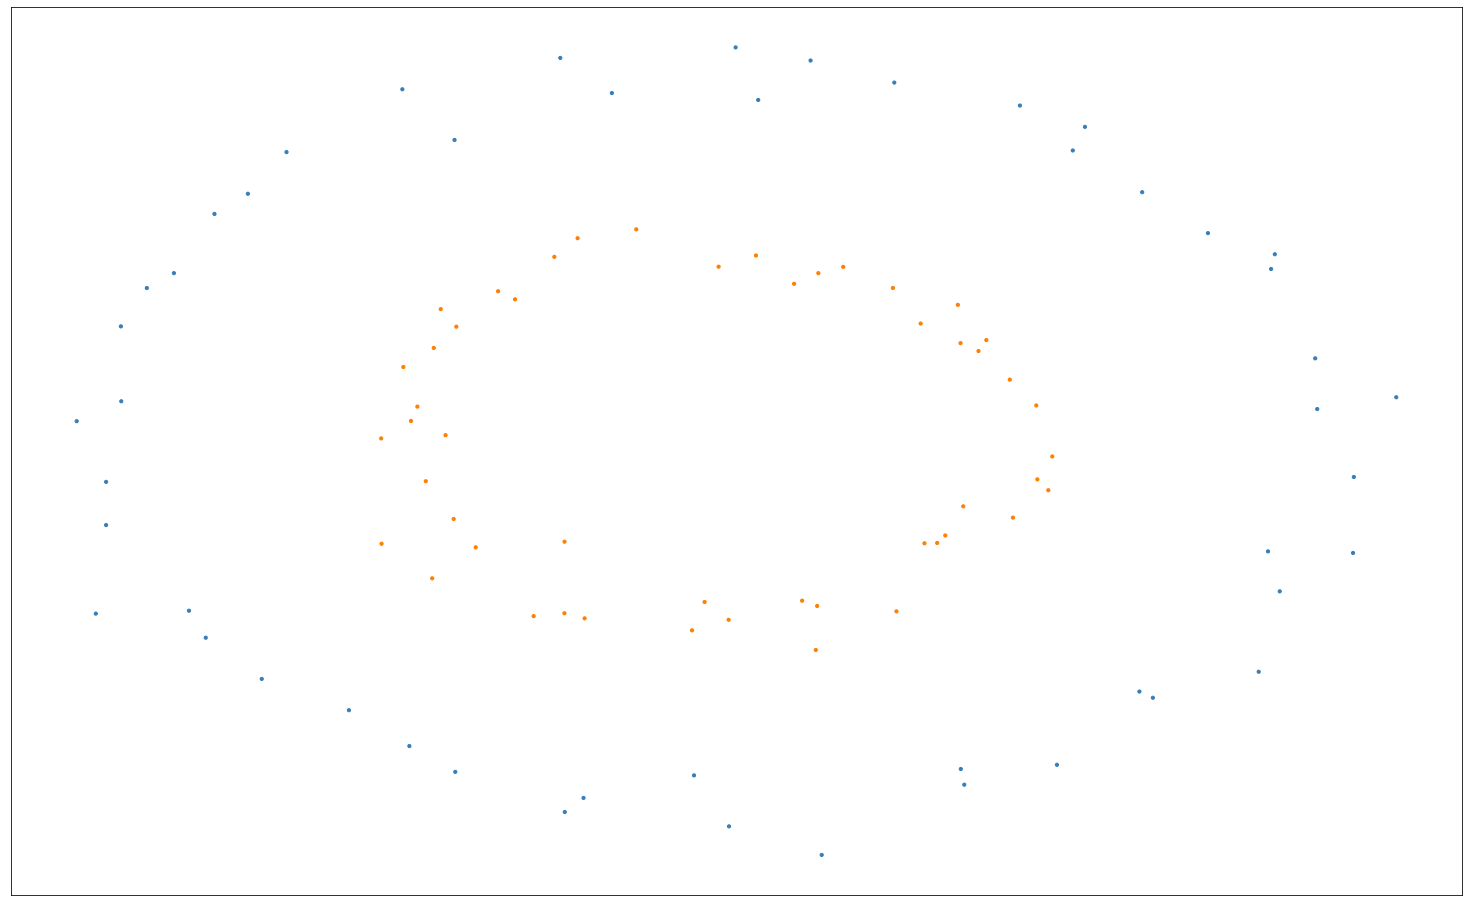

In [3]:
(X, y) = toyData(0, n_samples=100, plot=True).main()

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [5]:
class createMultipleNeuralNetworks():
    
    def __init__(self, train_X, train_y, n_neural_networks=10,n_hidden_layers=0, n_categories=2, neuron_number_list = [512], activation_function_list=['relu', 'softmax'], loss_list=['binary_crossentropy'], optimizer_list=['adam'], epochs_list=[1], batch_size_list=[32], input_shape=(None, 500, 2)):
        self.train_X = train_X
        self.train_y = train_y
        self.n_neural_networks = int(n_neural_networks)
        self.n_hidden_layers = int(n_hidden_layers)
        self.n_categories = int(n_categories)
        self.neuron_number_list = neuron_number_list
        self.activation_function_list = list(activation_function_list)
        self.loss_list = list(loss_list)
        self.optimizer_list = list(optimizer_list)
        self.epochs_list = list(epochs_list)
        self.batch_size_list = list(batch_size_list)
        self.input_shape = input_shape
    
    def add_dense_layer(self, model, input_layer=False):
        # Random number of layers, and activation function
        neuron_number = np.random.choice(self.neuron_number_list)
        print("Number of nuerons: ", neuron_number)
        activation_function = np.random.choice(self.activation_function_list)
        print("Activation Function: ", activation_function)
        
        if input_layer is True:
            model.add(Dense(neuron_number, activation=activation_function, input_shape= self.input_shape))   
        else:
            model.add(Dense(neuron_number, activation=activation_function))   
        
        return model
    
    def getConfigFiles(self, path = '\\Config\\ETL\\', config_name = ''):
        current_path = os.getcwd()
        folder_code = os.path.dirname(current_path)
        folder_working =  os.path.dirname(folder_code)
        config_path = folder_working + path + config_name
        return config_path
    
    def generate_model(self):
        model = Sequential()
        
        # Input layer
        model = self.add_dense_layer(model, input_layer=True)
        
        # Hidden layers
        for _ in range(self.n_hidden_layers):
            model = self.add_dense_layer(model,  input_layer=False)

        # Output layer
        model.add(Dense(self.n_categories, activation="softmax"))
        print('Random neural network architecture summary: ')
        model.summary()
        
        return model 
    
    def save_models(self, i, model):
        return model.save('neural_networks/model'+str(i)+".h5")
    
    def train(self, model):
        loss = np.random.choice(self.loss_list)
        optimizer = np.random.choice(self.optimizer_list)
        model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
        
        batch_size = np.random.choice(self.batch_size_list)
        epochs = np.random.choice(self.epochs_list)
        # Fitting model on training data
        model.fit(self.train_X, self.train_y, batch_size=batch_size, epochs=epochs, verbose=1)
        return model
    
    def main(self):
        for i in range(1, self.n_neural_networks):
            model = self.generate_model()
            model = self.train(model)
            self.save_models(i, model)
            
        neural_networks_list = [self.generate_model() for _ in range(self.n_neural_networks)]
        return neural_networks_list


In [6]:
models = createMultipleNeuralNetworks(X, y, n_neural_networks=10).main()

Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 500, 512)    1536      
                                                                 
 dense_1 (Dense)             (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 1s 7ms/step - loss: 0.6863 - accuracy: 0.5000
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)

Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 1s 4ms/step - loss: 0.6921 - accuracy: 0.4600
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, None, 500, 512)    1536      
                                                                 
 dense_13 (Dense)            (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture sum

                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, None, 500, 512)    1536      
                                                                 
 dense_27 (Dense)            (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_14"
________________________________

In [9]:
import json
import os
def get_inputs_from_json(path = '\\configs\\', config_name = 'neural_network.cfg'):
    current_path = os.getcwd()
    config_path = current_path + "\\configs\\" + "configurations.json"
    with open(config_path) as f:
            file = json.load(f)
            return list(file['Neural_Network_Generator'].values())


In [12]:
# Run from json file
nn_inputs = get_inputs_from_json()
createMultipleNeuralNetworks(X, y, *nn_inputs).main()

Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, None, 500, 100)    300       
                                                                 
 dense_77 (Dense)            (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 525ms/step - loss: 0.7040 - accuracy: 0.5000
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Den

 dense_86 (Dense)            (None, None, 500, 100)    300       
                                                                 
 dense_87 (Dense)            (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 475ms/step - loss: 0.6932 - accuracy: 0.5000
Number of nuerons:  512
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, None, 500, 512)    1536      
                                                                 
 dense_89 (Dense)            (None, None, 500, 2)      1026      
                                                                 
Tota

 dense_95 (Dense)            (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 1s 4ms/step - loss: 0.6869 - accuracy: 0.5000
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, None, 500, 512)    1536      
                                                                 
 dense_97 (Dense)            (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
4/4 

2/2 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.5300
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_107 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
4/4 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.4600
Epoch 2/3
4/4 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/3
4/4 [==============================] - 0s 4ms/step - loss: 0.6931 -

1/1 [==============================] - 1s 598ms/step - loss: 0.7028 - accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 7ms/step - loss: 0.6998 - accuracy: 0.4600
Epoch 3/3
1/1 [==============================] - 0s 9ms/step - loss: 0.6970 - accuracy: 0.4500
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_117 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
2/2 [==============================] - 1s 6ms/step - loss: 0.6935 - 

4/4 [==============================] - 1s 4ms/step - loss: 0.6976 - accuracy: 0.4600
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_127 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 527ms/step - loss: 0.6982 - accuracy: 0.5000
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_64"
________________________________________________________________

2/2 [==============================] - 1s 6ms/step - loss: 0.6945 - accuracy: 0.4300
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_137 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1/1 [==============================] - 1s 500ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5300
Epoch 3/3
1/1 [==============================] - 0s 7ms/step - loss: 0.6933 - 

1/1 [==============================] - 0s 6ms/step - loss: 0.6857 - accuracy: 0.5000
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_147 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1/1 [==============================] - 1s 572ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3/3
1/1 [==============================] - 0s 10ms/step - loss: 0.693

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_157 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
2/2 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 2/3
2/2 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5200
Epoch 3/3
2/2 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5100
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_79"
_________________________________________________________________
 

 dense_166 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_167 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.5000
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_169 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total 

2/2 [==============================] - 1s 6ms/step - loss: 0.6975 - accuracy: 0.5200
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_179 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.4800
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_90"
________________________________________________________

4/4 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5100
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_189 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 542ms/step - loss: 0.6974 - accuracy: 0.4800
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_95"
_____________________________________________________________

                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5000
Number of nuerons:  512
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_201 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1/1 [==============================] - 1s 571ms/step - 

_________________________________________________________________
2/2 [==============================] - 1s 6ms/step - loss: 0.6973 - accuracy: 0.4900
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_211 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
4/4 [==============================] - 1s 4ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 2/3
4/4 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.4900
Epoch 3/3
4/4

Epoch 1/3
1/1 [==============================] - 1s 546ms/step - loss: 0.6957 - accuracy: 0.5100
Epoch 2/3
1/1 [==============================] - 0s 6ms/step - loss: 0.6952 - accuracy: 0.5600
Epoch 3/3
1/1 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.6100
Number of nuerons:  512
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_221 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 0.69

1/1 [==============================] - 0s 498ms/step - loss: 0.6937 - accuracy: 0.5200
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_230 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_231 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1/1 [==============================] - 1s 553ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 7ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 3/3
1/1 [==============================] - 0s 8ms/step - loss: 0.6948

4/4 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.4900
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_241 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 1s 6ms/step - loss: 0.6950 - accuracy: 0.5000
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_121"
________________________________________________________________

4/4 [==============================] - 1s 4ms/step - loss: 0.6992 - accuracy: 0.5100
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_250 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_251 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 6ms/step - loss: 0.6966 - accuracy: 0.5000
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_126"
________________________________________________________________

1/1 [==============================] - 0s 496ms/step - loss: 0.6931 - accuracy: 0.5000
Number of nuerons:  512
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_261 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 1s 6ms/step - loss: 0.6958 - accuracy: 0.4900
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_131"
__________________________________________________________

1/1 [==============================] - 1s 527ms/step - loss: 0.6931 - accuracy: 0.5000
Number of nuerons:  512
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_270 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_271 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1/1 [==============================] - 0s 500ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 8ms/step - loss: 0.6935 - accuracy: 0.4000
Epoch 3/3
1/1 [==============================] - 0s 10ms/step - loss: 0

Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_286 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_287 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_288 (Dense)           (None, None, 500, 100)    300       
                          

 dense_307 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_154"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_308 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_309 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  softmax
Random neural network architect

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_328 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_329 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_165"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_331 (Dense)           (None, None, 500, 2)      202       
                    

                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_350 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_351 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_176"
____________________________

 Layer (type)                Output Shape              Param #   
 dense_370 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_371 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_372 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_373 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Traina

Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_196"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_392 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_393 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_197"
_________________________________________________________________
 Layer (type)                Output Sh

 dense_412 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_413 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  512
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_207"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_414 (Dense)           (None, None, 500, 512)    1536      
                                                                 
 dense_415 (Dense)           (None, None, 500, 2)      1026      
                                                                 
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_______________

Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  relu
Random neural network architecture summary: 
Model: "sequential_217"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_434 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_435 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  tanh
Random neural network architecture summary: 
Model: "sequential_218"
_________________________________________________________________
 Layer (type)                Outpu

 dense_454 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_455 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
Number of nuerons:  100
Activation Function:  softmax
Random neural network architecture summary: 
Model: "sequential_228"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_456 (Dense)           (None, None, 500, 100)    300       
                                                                 
 dense_457 (Dense)           (None, None, 500, 2)      202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_______________________

In [11]:
get_inputs_from_json()

[100,
 0,
 2,
 [512, 100, 100],
 ['relu', 'softmax', 'tanh'],
 ['binary_crossentropy'],
 ['adam'],
 [1, 3],
 [32, 64, 128]]

In [ ]:
import os
# import configparser
# def get_inputs_from_config(path = '\\configs\\', config_name = 'neural_network.cfg'):
#     current_path = os.getcwd()
#     print(current_path)
#     config_path = current_path + path + config_name
    
#     configParser = configparser.RawConfigParser()   
#     configFilePath = config_path
#     configParser.readfp(open(config_path))
#     inputs = [i[1].split(",") if "," in i[1] else i[1] for i in list(configParser.items('Neural_Network_Generator'))]
#     return inputs